In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
irisData = load_iris()
print(irisData.keys())
dfData = pd.DataFrame(np.c_[irisData["data"], irisData["target"]],
                      columns = irisData["feature_names"]+["target"])
print(dfData.head())  # Take a look at the data to understand data structure

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


In [2]:
dfData.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [3]:
# What type of data do we have? DO we have categorical or ordinal data in addition to numerical?
dfData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [4]:
# Create a train & test sets
from sklearn.model_selection import StratifiedShuffleSplit
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in stratSplit.split(dfData[irisData["feature_names"]], dfData["target"]):
    X_train = dfData[irisData["feature_names"]].iloc[train_index]
    X_test = dfData[irisData["feature_names"]].iloc[test_index]
    
    y_train = dfData["target"].iloc[train_index]
    y_test = dfData["target"].iloc[test_index]
    
    #dfTrain = dfData.iloc[train_index]
    #dfTest = dfData.iloc[test_index]

In [5]:
X_train.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [6]:
y_train.isnull().sum()

0

C:\Users\eequa\AppData\Local\Temp\ipykernel_6712\1974599496.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(X_train[irisData["feature_names"]],


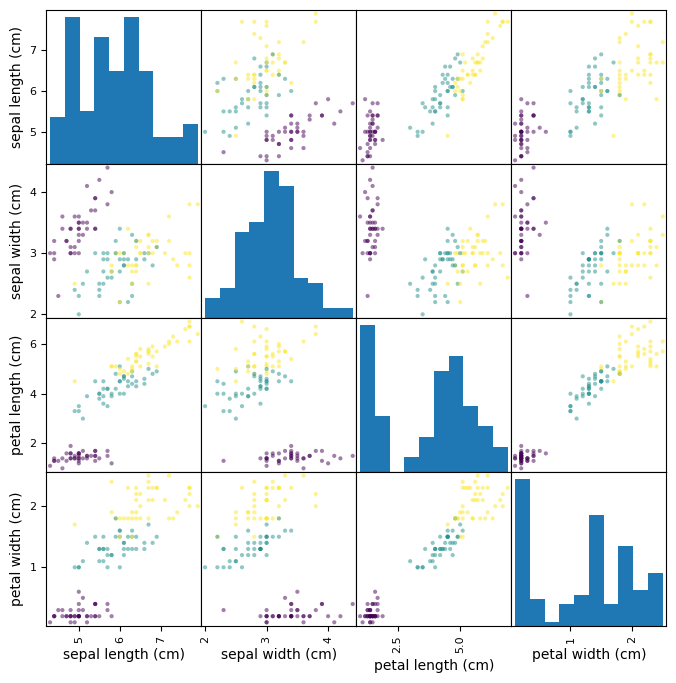

In [7]:
# Relation plot between all our columns
fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
pd.plotting.scatter_matrix(X_train[irisData["feature_names"]],
                           ax=ax,
                           c=y_train.values,
                           alpha=0.5)
plt.show()

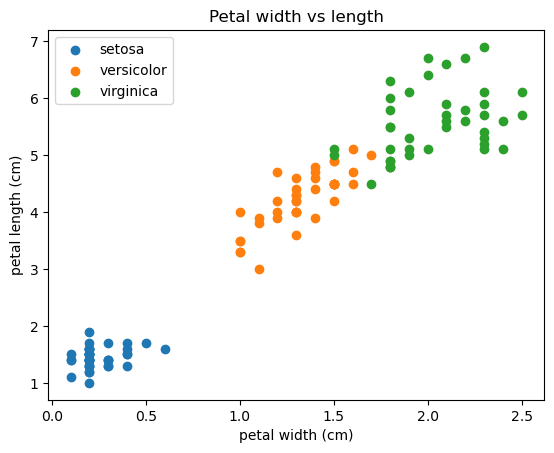

In [8]:
#color coding sccatter plot of 2 of our columns
for i in [int(x) for x in y_train.unique().tolist()]:
    plt.scatter(x=X_train.loc[y_train==i]["petal width (cm)"],
                y=X_train.loc[y_train==i]["petal length (cm)"],
               label = irisData["target_names"][i])
plt.xlabel("petal width (cm)")
plt.ylabel("petal length (cm)")
plt.title("Petal width vs length")
plt.legend()
plt.show()

In [9]:
#Correlation, not very useful for non-numerical or non-ordinal categorical targets though
pd.concat([X_train,y_train],axis=1).corr().style.background_gradient(cmap="summer",low=2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.085510,0.883336,0.832135,0.798337
sepal width (cm),-0.085510,1.000000,-0.392407,-0.339855,-0.392054
petal length (cm),0.883336,-0.392407,1.000000,0.965460,0.947948
petal width (cm),0.832135,-0.339855,0.965460,1.000000,0.958246
target,0.798337,-0.392054,0.947948,0.958246,1.000000


In [10]:
dfTrain = pd.concat([X_train,y_train],axis=1)
labels = dfTrain["target"].unique().tolist()
for label in labels:
#     dfTrain["label "+str(int(label))] = dfTrain["target"].apply(lambda x: 1 if x == label else 0)
    dfTrain[str(irisData["target_names"][int(label)])] = dfTrain["target"].apply(lambda x: 1 if x == label else 0)
    
    
#Interpreting this is a bit less clear, since our correlations show us if the target is located at the higher or
#lower end of the spectrum of that feature
dfTrain.corr()[["setosa","versicolor","virginica"]].style.background_gradient(cmap="summer",low=2)

#Correlations to target values are much easier to interpret for ordinal and numerical data,
#where ordering actually exists

,setosa,versicolor,virginica
sepal length (cm),-0.710066,0.037372,0.672694
sepal width (cm),0.577133,-0.475208,-0.101925
petal length (cm),-0.916907,0.191918,0.724988
petal width (cm),-0.888894,0.118056,0.770837
target,-0.866025,-0.000000,0.866025
setosa,1.000000,-0.500000,-0.500000
versicolor,-0.500000,1.000000,-0.500000
virginica,-0.500000,-0.500000,1.000000


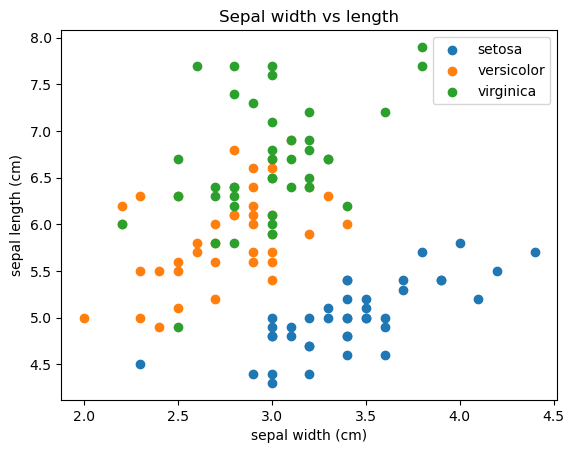

In [11]:
for i in [int(x) for x in y_train.unique().tolist()]:
    plt.scatter(x=X_train.loc[y_train==i]["sepal width (cm)"],
                y=X_train.loc[y_train==i]["sepal length (cm)"],
               label = irisData["target_names"][i])
plt.xlabel("sepal width (cm)")
plt.ylabel("sepal length (cm)")
plt.title("Sepal width vs length")
plt.legend()
plt.show()

In [12]:
#Small feature engineering
dfTrain["petal wl ratio"] = dfTrain["petal width (cm)"]/dfTrain["petal length (cm)"]
dfTrain["sepal wl ratio"] = dfTrain["sepal width (cm)"]/dfTrain["sepal length (cm)"]
dfTrain.corr()[["setosa","versicolor","virginica"]].style.background_gradient(cmap="summer",low=2)

,setosa,versicolor,virginica
sepal length (cm),-0.710066,0.037372,0.672694
sepal width (cm),0.577133,-0.475208,-0.101925
petal length (cm),-0.916907,0.191918,0.724988
petal width (cm),-0.888894,0.118056,0.770837
target,-0.866025,-0.000000,0.866025
setosa,1.000000,-0.500000,-0.500000
versicolor,-0.500000,1.000000,-0.500000
virginica,-0.500000,-0.500000,1.000000
petal wl ratio,-0.825941,0.221642,0.604300
sepal wl ratio,0.900719,-0.398160,-0.502559
